# Probleemstelling


Sinds Donald Trump in 2016 president werd, is er veel discussie over de houding tegenover de LGBTQI+-gemeenschap in America. In media en wetenschappelijke literatuur wordt gesuggereerd dat negatieve uitingen zoals discriminatie, haatspraak en online aanvallen zijn toegenomen Rodriguez et al. (2025). Vanuit een data science-perspectief is het echter onduidelijk in hoeverre deze vermeende toename daadwerkelijk zichtbaar is in online discussies en hoe deze zich over tijd ontwikkelt. Daarom zijn wij als data scientists gestart met dit project, waarin we onderzoeken hoe de houding tegenover de LGBTQI+ -gemeenschap zich sinds 2016 heeft ontwikkeld op Reddit en welke trends we zien in sentiment (positief/neutraal/negatief) over tijd?. Reddit is namelijk een geschikt platform voor dit onderzoek vanwege de grote hoeveelheid publieke discussies en de aanwezigheid van zowel LGBTQI+-gerichte communities als politiek georiënteerde subreddits.

**Schets van literatuuronderzoek**

Uit literatuur onderzoek blijkt dat LGBTQ+-personen online geregeld worden geconfronteerd met hate speech, discriminatie en vijandige reacties . Analyse van sociale media en online forums laat zien dat dergelijke negatieve uitingen niet alleen frequent voorkomen, maar ook kunnen samenhangen met maatschappelijke en politieke gebeurtenissen die discussies over gender en seksualiteit intensiveren, Rodriguez et al. (2025). Deze bevindingen ondersteunen de veronderstelling dat negatieve ervaringen van LGBTQ+ gebruikers op platforms zoals Reddit een relevant en meetbaar onderzoeksdomein vormen voor data-analyse.


Het onderzoek richt zich op de vragen: 
- Hoe is de houding tegenover de LGBTQI+-gemeenschap veranderd sinds 2016 en welke negatieve ervaringen komen daarbij naar voren?
- Welke trends zien we in sentiment (positief/neutraal/negatief) over tijd

**Benodigde informatie en data**

Om deze onderzoeksvragen te kunnen beantwoorden, zijn inzichten nodig in hoe leden van LGBTQI+-gerelateerde online gemeenschappen hun ervaringen beschrijven, hoe zij spreken over politiek en hoe zij hun dagelijks leven en interacties op sociale mediaplatformen ervaren. Benodigde data die we kunnen gebruiken zijn tekstuele inhoud data van Reddit-posts en -comments, metadata (zoals datum en tijd van plaatsing subreddit, score), afbeeldingen en audio. Hierbij kunnen we sentiment- en toxiciteitsscores met behulp van feature enginering gebruiken om de transcript en mate van negativiteit in de teksten te meten. Deze informatie maakt het mogelijk om veranderingen in houding en taalgebruik door de tijd heen te analyseren. 

**Bronnen en dataverzameling**

Om de benodigde data te verzamelen, worden de volgende bronnen en technieken gebruikt. **Reddit database**, Dit zijn grote datasets met posts en comments van Reddit. Met behulp van database scrapen en databasebestanden verwerken met Python kunnen we subreddits die gerelateerd zijn aan LGBTQI+-thema’s en benodigde kolommen filteren. Vervolgends is **Reddit API** ook waardevol. Hierbij kunnen we met behulp van API-calls gebruik maken van recente en populaire posts en afbeeldingen te verzamelen uit relevante subreddits zoals actuallesbians, gaybros, transgender en AskTrumpSupporters. Voor de audio's data kunnen we met behulp van selenium **video post van reddit** scrapen.

**Formaat van de ruwe data**

- Reddit posts en comments (Reddit database): Semi-gestructureerd (JSON-structuur met vaste velden en vrije tekst)
- Reddit posts: Semi-gestructureerd
- Afbeeldineg: Ongestructureerde en opgeslagen als JPG- en PNG-bestanden
- Audio's: Ongestructureerde en opgeslagen als mp3 bestanden


Rodriguez, V. J., Peterson, B., Benhayoun, A., & Liu, Q. (2025). Digital Hostility Toward LGBTQIA+ Research Recruitment on Social Media Using Topic Modeling and Sentiment Analysis of Facebook Comments: Quantitative Content Analysis Study. Journal Of Medical Internet Research, 27, e79080. https://doi.org/10.2196/79080
___

### Installatie en import

In [ ]:
#instal dit
#!pip install qbittorrent-api
#!pip install wordfreq
#!pip install lexicalrichness
#!pip install praw
#!pip install selenium-stealth
#!pip install SpeechRecognition
#!pip install pytesseract pillow
#!pip install torch torchvision torchaudio
#!pip uninstall regex -y
#!pip install regex
#!pip install websocket-client
#!pip install scikit-image
#!pip install transformers
#!pip install zstandard
#!{sys.executable} -m spacy download en_core_web_sm
#!pip install opencv-python #(new)
##!pip install noisereduce librosa soundfile #(new)
#!pip install datasets

#!pip winget install --id Gyan.FFmpeg -e #(dit moet in powershell)

In [1]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.


**ffmeg** installeren voordat de code gaat runnen. Dit is heel belangrijk voor de uadio gedeelte.

In [50]:
import pandas as pd
import zipfile
import zstandard as zstd
import io
from pathlib import Path
import json
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

import seaborn as sns
import praw

from wordfreq import zipf_frequency

import requests
import qbittorrentapi
import sys
import librosa
import numpy as np
import IPython.display as ipd
from wordfreq import zipf_frequency
import numpy as np
from collections import Counter
import zipfile
import zstandard as zstd
import io
from pathlib import Path
import json

from pathlib import Path
import zstandard as zstd
import io
import json
from lexicalrichness import LexicalRichness
import os
import requests

import praw

from datasets import load_dataset

import websocket

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
import time
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.options import Options
from selenium_stealth import stealth

import speech_recognition as sr
from pydub import AudioSegment

from urllib.parse import urlparse
import re
import subprocess

import soundfile as sf
import noisereduce as nr

import librosa.display
from skimage import color, img_as_ubyte
from skimage import io

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from selenium_stealth import stealth


from collections import Counter

from PIL import Image
import pytesseract

# 1.0 Data extractie

## 1.1 Huggingface database

In [51]:
dataset = load_dataset("tweet_eval", "sentiment", split="train")
df_text_sentiment = pd.DataFrame(dataset)

df_text_sentiment.head()


,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [52]:
dataset = load_dataset("civil_comments", split="train")
df_text_toxic = pd.DataFrame(dataset)
df_text_toxic.head()


,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
1,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
2,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
3,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.0,0.87234,0.021277,0.0


#### Omschrijving
In dit project is gebruikgemaakt van Hugging Face Datasets als publiek beschikbare database voor het verzamelen van tekstuele data. Hugging Face is een open platform waarop grote, gestructureerde datasets beschikbaar worden gesteld voor onderzoek en machine learning. Deze datasets zijn vrij toegankelijk en kunnen via een API direct in Python worden geladen, zonder handmatig downloaden.

Civil Comments is een publiek toegankelijke niet-relationele dataset die via Hugging Face beschikbaar is. De dataset bevat online reacties die zijn geannoteerd op verschillende vormen van toxisch en schadelijk taalgebruik. Naast algemene toxiciteit bevat de dataset specifieke indicatoren voor identity-based aanvallen, waaronder aanvallen gericht op seksuele oriëntatie en gender. In dit onderzoek wordt deze dataset gebruikt om patronen van negatieve en discriminerende uitingen tegenover LGBTQI+-groepen te analyseren.

ChatGPT 5.2, prompt: 12: Data extraheren alternatieven, https://chatgpt.com/share/6973cc76-7488-8009-833b-0aa6881857f6

# 1.2 Reddit api-subreddit's

In [53]:
# User keys in voeren
reddit = praw.Reddit( 
    client_id='1_1scQMC3-HuAahSfnzl9Q', 
    client_secret='hxpZ0C7HtlSHoN3879rHdP0iNPEjNQ', 
    user_agent='u/Fit_Island1938', 

    
) 

# Container maken
data = []

# Step 3: Scrape posts
subreddits = ['actuallesbians', 'gaybros', 'transgender', 'AskTrumpSupporters']

for name in subreddits:
    subreddit = reddit.subreddit(name)
    for post in subreddit.top(limit=500):
        data.append({
            'subreddit': name,
            'title': post.title,
            'score': post.score,
            'url': post.url,
            'text': post.selftext,
            'created_utc': post.created_utc,
            'id': post.id,
            'author': str(post.author)
        })

# Step 4: Convert to DataFrame
df_subreddit = pd.DataFrame(data)
df_subreddit['created_utc'] = pd.to_datetime(df_subreddit['created_utc'], unit='s')


# Step 5: Preview or save
display(df_subreddit.info())
df_subreddit.to_csv('reddit_lgbtq_trump_posts.csv', index=False)
display(df_subreddit)

<class 'pandas.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype        
---  ------       --------------  -----        
 0   subreddit    1987 non-null   str          
 1   title        1987 non-null   str          
 2   score        1987 non-null   int64        
 3   url          1987 non-null   str          
 4   text         1987 non-null   str          
 5   created_utc  1987 non-null   datetime64[s]
 6   id           1987 non-null   str          
 7   author       1987 non-null   str          
dtypes: datetime64[s](1), int64(1), str(6)
memory usage: 946.9 KB


None

,subreddit,title,score,url,text,created_utc,id,author
0,actuallesbians,Why is it never me?!😭,17279,https://i.redd.it/9obr4x6aavrd1.jpeg,,2024-09-30 03:37:10,1fsmicm,LilDemonAnubis
1,actuallesbians,Actor Murdered First Day of Pride,13747,https://i.redd.it/usia4qbpwk4f1.jpeg,I know I posted something that got the ladies ...,2025-06-02 21:05:49,1l1tp5u,None
2,actuallesbians,90% of the series,13382,https://i.redd.it/xsvixgkymh3c1.jpg,,2023-11-30 13:35:15,187io2m,None
3,actuallesbians,Teaching Nancy New Combos,12564,https://i.redd.it/c4ttt6e5q1sf1.png,,2025-09-29 06:14:39,1ntalcz,dreamed2life
4,actuallesbians,Ordo Iuris. Upvote so that this picture shows ...,11685,https://i.redd.it/fa2bsprjed251.jpg,,2020-06-01 21:55:20,gutzjs,Frank-Blue
...,...,...,...,...,...,...,...,...
1982,AskTrumpSupporters,Donald Trumps slogan for his 2020 presidential...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,What do you feel Donald Trump has done to make...,2020-07-23 03:45:10,hw8nm5,fluffyypickel
1983,AskTrumpSupporters,What do you think of Trump's new medical advisor?,337,https://www.reddit.com/r/AskTrumpSupporters/co...,[Scott Atlas](https://www.forbes.com/sites/mat...,2020-08-15 12:23:16,ia6eqx,not_falling_down
1984,AskTrumpSupporters,Lori Klaustis's widow asked Twitter to remove ...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,Lori Klaustis was part of Joe Scarborough's co...,2020-05-26 17:14:26,gr169e,goko305
1985,AskTrumpSupporters,CPAC formally uninvited Mitt Romney after his ...,333,https://www.reddit.com/r/AskTrumpSupporters/co...,"[BREAKING: The ""extreme conservative"" and Juni...",2020-02-01 22:01:01,exddli,Quidfacis_


#### Omschrijving voor post dataset

Om de post dataset te krijgen, gebruiken we de Reddit API en de Python-library PRAW. PRAW maakt een API-client aan om Reddit te benaderen. En dan worden de posts verzameld uit gekozen subreddits zoals actuallesbians, gaybros, transgender en AskTrumpSupporters. Voor elke subreddit worden de populaire posts op dat moment opgehaald met een limiet van 500 posts per subreddit. Van elke post wordt relevante informatie opgeslagen zoals de subredditnaam, titel, score, url, tekst, tijdstip van plaatsing, post-id en author. Daarna wordt de verzamelde data omgezet naar een pandas DataFrame, waarbij de UNIX-tijd wordt geconverteerd naar een leesbaar datum/tijd-formaat. Tot slot wordt de dataset opgeslagen als CSV-bestand.
___

### 1.2.1 Afbeelding

Kijk of api samen kunnne mits tijd 

In [54]:
# Afbeelding scrapen
reddit = praw.Reddit(
    client_id='1_1scQMC3-HuAahSfnzl9Q',
    client_secret='hxpZ0C7HtlSHoN3879rHdP0iNPEjNQ',
    user_agent='script:reddit-image-scraper:v1.0 (by u/Fit_Island1938)'
)


subreddit_names = ['actuallesbians', 'gaybros', 'transgender', 'AskTrumpSupporters']
save_dir = "reddit_images"
os.makedirs(save_dir, exist_ok=True)

image_rows = []

for subreddit_name in subreddit_names:
    subreddit = reddit.subreddit(subreddit_name)

    for post in subreddit.top(time_filter="all", limit=50):
        if post.url.lower().endswith((".jpg", ".png")):
            img_url = post.url
            ext = img_url.split(".")[-1]
            filename = f"{post.id}.{ext}"
            filepath = os.path.join(save_dir, filename)

            try:
                r = requests.get(img_url, timeout=10)
                if r.status_code == 200:
                    with open(filepath, "wb") as f:
                        f.write(r.content)

                    image_rows.append({
                        "post_id": post.id,
                        "title": post.title,
                        "subreddit": subreddit_name,
                        "image_path": filepath,
                        "score": post.score,
                        "created_utc": post.created_utc
                    })
            except requests.exceptions.RequestException:
                pass  

df_images_raw = pd.DataFrame(image_rows)
display(df_images_raw)


,post_id,title,subreddit,image_path,score,created_utc
0,187io2m,90% of the series,actuallesbians,reddit_images/187io2m.jpg,13386,1.701351e+09
1,1ntalcz,Teaching Nancy New Combos,actuallesbians,reddit_images/1ntalcz.png,12558,1.759126e+09
2,gutzjs,Ordo Iuris. Upvote so that this picture shows ...,actuallesbians,reddit_images/gutzjs.jpg,11684,1.591049e+09
3,ii4xag,"I mean, it's a fair response!",actuallesbians,reddit_images/ii4xag.jpg,11295,1.598612e+09
4,v58oy7,Good husband,actuallesbians,reddit_images/v58oy7.jpg,11220,1.654416e+09
...,...,...,...,...,...,...
63,ah1ki1,"Today is an important day for me, thought I’d ...",gaybros,reddit_images/ah1ki1.jpg,8034,1.547754e+09
64,phpjw3,fifteen years with my boyfriend (feat. gay dom...,gaybros,reddit_images/phpjw3.jpg,8013,1.630754e+09
65,zcmzxx,My first boyfriend and our first Christmas tree,gaybros,reddit_images/zcmzxx.jpg,7997,1.670191e+09
66,h0h6u0,My husband and I are bringing this little guy ...,gaybros,reddit_images/h0h6u0.jpg,7874,1.591815e+09


#### Omschrijving voor afbeelding dataset

Net zoals post dataset hebben we gebruikt maken van Reddit API via de Python-library PRAW. Hiervoor gebruiken we ook dezelfde subreddits. In de for-loop wordt er gezocht naar posts met de hoogste score van aller tijden. Vervolgens wordt gecontroleerd of een post direct linkt naar een afbeeldingsbestand bijvoorbeeld .jpg of .png. Als dit het geval is, wordt de afbeelding via een HTTP-request gedownload en lokaal opgeslagen in een map reddit_images. Naast het downloaden van de afbeelding wordt per post ook metadata bijgehouden net zoals post dataset. Daarna wordt het uiteindelijk opgeslagen in een DataFrame.

**Bron :** Tomer-Barkan. (2022, 30 juli). How do I only scrape image reddit posts using PRAW? Stack Overflow. https://stackoverflow.com/questions/72504236/how-do-i-only-scrape-image-reddit-posts-using-praw
___

### 1.2.2 Post dataset mergen met afbeelding dataset 

In [55]:
df_images_raw['id'] = df_images_raw['post_id']
df_postapi_af = df_subreddit.merge(df_images_raw[['id', 'image_path']],on='id',how='left')
df_postapi_af['has_image'] = df_postapi_af['image_path'].notna()
df_postapi_af

,subreddit,title,score,url,text,created_utc,id,author,image_path,has_image
0,actuallesbians,Why is it never me?!😭,17279,https://i.redd.it/9obr4x6aavrd1.jpeg,,2024-09-30 03:37:10,1fsmicm,LilDemonAnubis,NaN,False
1,actuallesbians,Actor Murdered First Day of Pride,13747,https://i.redd.it/usia4qbpwk4f1.jpeg,I know I posted something that got the ladies ...,2025-06-02 21:05:49,1l1tp5u,None,NaN,False
2,actuallesbians,90% of the series,13382,https://i.redd.it/xsvixgkymh3c1.jpg,,2023-11-30 13:35:15,187io2m,None,reddit_images/187io2m.jpg,True
3,actuallesbians,Teaching Nancy New Combos,12564,https://i.redd.it/c4ttt6e5q1sf1.png,,2025-09-29 06:14:39,1ntalcz,dreamed2life,reddit_images/1ntalcz.png,True
4,actuallesbians,Ordo Iuris. Upvote so that this picture shows ...,11685,https://i.redd.it/fa2bsprjed251.jpg,,2020-06-01 21:55:20,gutzjs,Frank-Blue,reddit_images/gutzjs.jpg,True
...,...,...,...,...,...,...,...,...,...,...
1982,AskTrumpSupporters,Donald Trumps slogan for his 2020 presidential...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,What do you feel Donald Trump has done to make...,2020-07-23 03:45:10,hw8nm5,fluffyypickel,NaN,False
1983,AskTrumpSupporters,What do you think of Trump's new medical advisor?,337,https://www.reddit.com/r/AskTrumpSupporters/co...,[Scott Atlas](https://www.forbes.com/sites/mat...,2020-08-15 12:23:16,ia6eqx,not_falling_down,NaN,False
1984,AskTrumpSupporters,Lori Klaustis's widow asked Twitter to remove ...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,Lori Klaustis was part of Joe Scarborough's co...,2020-05-26 17:14:26,gr169e,goko305,NaN,False
1985,AskTrumpSupporters,CPAC formally uninvited Mitt Romney after his ...,333,https://www.reddit.com/r/AskTrumpSupporters/co...,"[BREAKING: The ""extreme conservative"" and Juni...",2020-02-01 22:01:01,exddli,Quidfacis_,NaN,False


##### Kleine toelichting

Aanzien dat post dataset en afbeelding dataset zijn van Reddit API, hebben we besloten om beide datasets samentoevoegen op 'id' kolom. Zodat het niet lost staat van elkaar.
___

# 1.3 Webscraping- Reddit Video (minimum 15 minuten)

#### Video post scrapen

In [ ]:
def make_driver(headless=True):
    options = webdriver.ChromeOptions()
    if headless:
        # newer chrome headless mode
        options.add_argument("--headless=new")
    options.add_argument("--window-size=1200,900")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    driver = webdriver.Chrome(options=options)

    stealth(
        driver,
        user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36",
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
    )
    return driver


def dismiss_cookie_banner(driver, timeout=5):
    def try_click():
        selectors = [
            (By.ID, "onetrust-accept-btn-handler"),
            (By.CSS_SELECTOR, "button#onetrust-accept-btn-handler"),
            (By.XPATH, "//button[contains(translate(., 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'abcdefghijklmnopqrstuvwxyz'), 'accept & continue')]"),
            (By.XPATH, "//button[contains(translate(., 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'abcdefghijklmnopqrstuvwxyz'), 'accept all')]"),
        ]
        for by, locator in selectors:
            try:
                WebDriverWait(driver, timeout).until(EC.element_to_be_clickable((by, locator))).click()
                return True
            except TimeoutException:
                continue
        return False

    if try_click():
        return True

    frames = driver.find_elements(
        By.CSS_SELECTOR,
        "iframe[id*='sp_message'], iframe[src*='consent'], iframe[id*='ot-pc-frame']"
    )
    for frame in frames:
        driver.switch_to.frame(frame)
        if try_click():
            driver.switch_to.default_content()
            return True
        driver.switch_to.default_content()

    return False


def collect_video_posts(driver):
    return driver.execute_script("""
        const results = [];
        const posts = document.querySelectorAll('shreddit-post');

        posts.forEach(post => {
            const postType = post.getAttribute('post-type');
            if (postType !== 'video') return;

            const postId = post.getAttribute('id');
            const author = post.getAttribute('author');
            const authorId = post.getAttribute('author-id');

            const player = post.querySelector('shreddit-player');
            if (!player) return;

            const src = player.getAttribute('src');
            if (!src || !src.includes('HLSPlaylist.m3u8')) return;

            results.push({
                post_id: postId,
                author: author,
                author_id: authorId,
                video_url: src
            });
        });

        return results;
    """)


def scroll_and_collect_video_posts(driver, scrolls=40, pause=2.0):
    collected = {}
    for _ in range(scrolls):
        posts = collect_video_posts(driver)
        for p in posts:
            if p.get("post_id"):
                collected[p["post_id"]] = p  # dedupe
        driver.execute_script("window.scrollBy(0, Math.floor(window.innerHeight * 1.2));")
        time.sleep(pause)
    return list(collected.values())


def scrape_subreddit(driver, subreddit, scrolls=40, pause=2.0):
    # Accept either "actuallesbians" or full URL
    if subreddit.startswith("http"):
        url = subreddit
        name = subreddit.rstrip("/").split("/r/")[-1].split("/")[0]
    else:
        name = subreddit.strip().strip("/")
        url = f"https://www.reddit.com/r/{name}/"

    driver.get(url)

    # wait for page base load
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )
    time.sleep(2)

    # cookies (doesn't always appear; ok)
    dismiss_cookie_banner(driver)

    # wait until at least some posts exist (best-effort)
    try:
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "shreddit-post"))
        )
    except TimeoutException:
        pass

    videos = scroll_and_collect_video_posts(driver, scrolls=scrolls, pause=pause)
    return name, videos




def scrape_post(driver, url, pause=2.0):
    # ensure full URL
    if url.startswith("/"):
        url = "https://www.reddit.com" + url

    driver.get(url)

    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )
    time.sleep(pause)

    dismiss_cookie_banner(driver)

    # Use something stable to identify the post page
    # Often there's at least one shreddit-post OR the comment tree.
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "shreddit-post, faceplate-tracker, shreddit-comment-tree"))
        )
    except TimeoutException:
        pass

    # Extract subreddit + post id from URL (for labeling results)
    m = re.search(r"/r/([^/]+)/comments/([^/]+)/", url) 
    subreddit = m.group(1) if m else "unknown"
    post_id = m.group(2) if m else url

    # Collect video(s) from this page (you need a function that works for a single post page)
    videos = collect_video_posts(driver)

    return subreddit, post_id, videos



In [57]:
if __name__ == "__main__":
    subreddits = ['actuallesbians', 'gaybros', 'transgender', 'AskTrumpSupporters']

    driver = make_driver(headless=True)

    subreddit_scraped = {}
    try:
        for sub in subreddits:
            name, videos = scrape_subreddit(driver, sub, scrolls=60, pause=2)
            subreddit_scraped[name] = videos
            print(f"[r/{name}] video posts: {len(videos)}")

        # print a few examples
        for name, videos in subreddit_scraped.items():
            print(f"\n=== r/{name} (showing up to 5) ===")
            for p in videos[:5]:
                print(p)

    finally:
        driver.quit()

[r/actuallesbians] video posts: 6
[r/gaybros] video posts: 0
[r/transgender] video posts: 0
[r/AskTrumpSupporters] video posts: 0

=== r/actuallesbians (showing up to 5) ===
{'author': 'nothingnanners', 'author_id': 't2_u20bgfmln', 'post_id': 't3_1qm5ayt', 'video_url': 'https://v.redd.it/x5jakwcpeefg1/HLSPlaylist.m3u8?f=sd%2CsubsAll%2ChlsSpecOrder&v=1&a=1771941272%2COTQxMDI3NzI0NGNmOWM0NzgxNDg5OTJiMTY3ZDg5NTY0YTZkNDJiYzA3YmZhNjI0MjdiNWU5YmU0NzhiYjMyMQ%3D%3D'}
{'author': 'transblonde', 'author_id': 't2_1wbkgrd0iz', 'post_id': 't3_1qgxqxo', 'video_url': 'https://v.redd.it/55l0i4erd9eg1/HLSPlaylist.m3u8?f=sd%2CsubsAll%2ChlsSpecOrder&v=1&a=1771941272%2CNmIyZDM5OWY3MWRmYzAxM2IwYzQ1NzNkZDljYTU4MmI1ODg3MjI1MmYwNDJjZGM0ODQ4ZTQ0NTBlNjg2MjUyOA%3D%3D'}
{'author': 'Lavender-n-Lipstick', 'author_id': 't2_12863lkz7l', 'post_id': 't3_1qg1rep', 'video_url': 'https://v.redd.it/lk7antwu32eg1/HLSPlaylist.m3u8?f=sd%2CsubsAll%2ChlsSpecOrder&v=1&a=1771941272%2CMDlhZGI4OGRhMzVlODE2MTdhNGU2N2VhZDg3ZGUxMTgyMmJ

ChatGPT 5.2, prompt: ik wil ook de username en id van die video post scrapen, Scraping Reddit Videos Python, https://chatgpt.com/share/69661e33-1fec-8009-95d2-528bd4254730

ChatGPT 5.2, prompt: i need my code to run for multible subreddits, https://chatgpt.com/share/6970e9bc-a844-800d-bd55-8193b837492f

Zanini, A., & Zanini, A. (2025, 16 september). How to Bypass CAPTCHAs With Selenium in Python. Bright Data. https://brightdata.com/blog/web-data/bypass-captchas-with-selenium


#### Omschrijving voor video 

Eerst wordt met behulp van Selenium een Chrome-driver gestart om een echte browseromgeving te simuleren. Deze aanpak is nodig omdat Reddit content laadt met JavaScript en gebruikmaakt van bot-detectie. Met behulp van selenium-stealth wordt het browsergedrag aangepast zodat eventuele CAPTCHA worden verminderd. Vervolgens navigeert de driver naar de gekozende subreddits. Zodra de pagina volledig is geladen, wordt een zelfgedefinieerde functie gebruikt om automatisch de cookiebanner te accepteren. Deze functie probeert verschillende veelvoorkomende cookie-knoppen te detecteren en te klikken, zowel op de hoofdpagina als binnen mogelijke iframes. Na het verwijderen van de cookiebanner start het daadwerkelijke scrapen van video-posts. Met behulp van een JavaScript-script dat via Selenium wordt uitgevoerd, worden alle shreddit-post elementen op de pagina geselecteerd. Alleen posts met het attribuut post-type="video" worden meegenomen. Voor elke video-post worden relevante metadata verzameld, waaronder de post-ID, auteur en auteur-ID. Na deze proces worden video's link in de dictionary opgeslagen.
___

# 2 Data opschonen en preprocessing

### 2.1.1 Afbeelding opschonen

In [58]:
import cv2

def gaussianblur(image_path, output_dir="images_clean", kernel_size=(5, 5),sigma=0):
    
    os.makedirs(output_dir, exist_ok=True)
    
    # pak de afbeelding in image path
    img = cv2.imread(image_path)
    # hier wordt im gecleaned
    clean = cv2.GaussianBlur(img, kernel_size, sigma)
    #Haalt alleen de naam uit het pad
    filename = os.path.basename(image_path)
    
    output_path = os.path.join(output_dir, filename)

    cv2.imwrite(output_path, clean)
    return output_path



In [59]:
# Alleen posts met een afbeelding selecteren
df_with_images = df_postapi_af[df_postapi_af["has_image"]].copy()

clean_images = []

for k, row in df_with_images.iterrows():
    out_path = gaussianblur(row["image_path"])
    clean_images.append(out_path)

df_postapi_af.loc[df_with_images.index, "clean_image_path"] = clean_images 

In [60]:
df_postapi_af

,subreddit,title,score,url,text,created_utc,id,author,image_path,has_image,clean_image_path
0,actuallesbians,Why is it never me?!😭,17279,https://i.redd.it/9obr4x6aavrd1.jpeg,,2024-09-30 03:37:10,1fsmicm,LilDemonAnubis,NaN,False,nan
1,actuallesbians,Actor Murdered First Day of Pride,13747,https://i.redd.it/usia4qbpwk4f1.jpeg,I know I posted something that got the ladies ...,2025-06-02 21:05:49,1l1tp5u,None,NaN,False,nan
2,actuallesbians,90% of the series,13382,https://i.redd.it/xsvixgkymh3c1.jpg,,2023-11-30 13:35:15,187io2m,None,reddit_images/187io2m.jpg,True,images_clean/187io2m.jpg
3,actuallesbians,Teaching Nancy New Combos,12564,https://i.redd.it/c4ttt6e5q1sf1.png,,2025-09-29 06:14:39,1ntalcz,dreamed2life,reddit_images/1ntalcz.png,True,images_clean/1ntalcz.png
4,actuallesbians,Ordo Iuris. Upvote so that this picture shows ...,11685,https://i.redd.it/fa2bsprjed251.jpg,,2020-06-01 21:55:20,gutzjs,Frank-Blue,reddit_images/gutzjs.jpg,True,images_clean/gutzjs.jpg
...,...,...,...,...,...,...,...,...,...,...,...
1982,AskTrumpSupporters,Donald Trumps slogan for his 2020 presidential...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,What do you feel Donald Trump has done to make...,2020-07-23 03:45:10,hw8nm5,fluffyypickel,NaN,False,nan
1983,AskTrumpSupporters,What do you think of Trump's new medical advisor?,337,https://www.reddit.com/r/AskTrumpSupporters/co...,[Scott Atlas](https://www.forbes.com/sites/mat...,2020-08-15 12:23:16,ia6eqx,not_falling_down,NaN,False,nan
1984,AskTrumpSupporters,Lori Klaustis's widow asked Twitter to remove ...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,Lori Klaustis was part of Joe Scarborough's co...,2020-05-26 17:14:26,gr169e,goko305,NaN,False,nan
1985,AskTrumpSupporters,CPAC formally uninvited Mitt Romney after his ...,333,https://www.reddit.com/r/AskTrumpSupporters/co...,"[BREAKING: The ""extreme conservative"" and Juni...",2020-02-01 22:01:01,exddli,Quidfacis_,NaN,False,nan


#### 2.1.2 Visualisatie voor- VS na- het ruis verwijderen

In [61]:
def show_verschill(raw_path, clean_path):
    raw = cv2.imread(raw_path)
    clean = cv2.imread(clean_path)

    # kleuren omzetten
    raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
    clean = cv2.cvtColor(clean, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(raw)
    plt.title("Origineel")

    plt.subplot(1, 2, 2)
    plt.imshow(clean)
    plt.title("Opgeschoond")


    plt.tight_layout()
    plt.show()

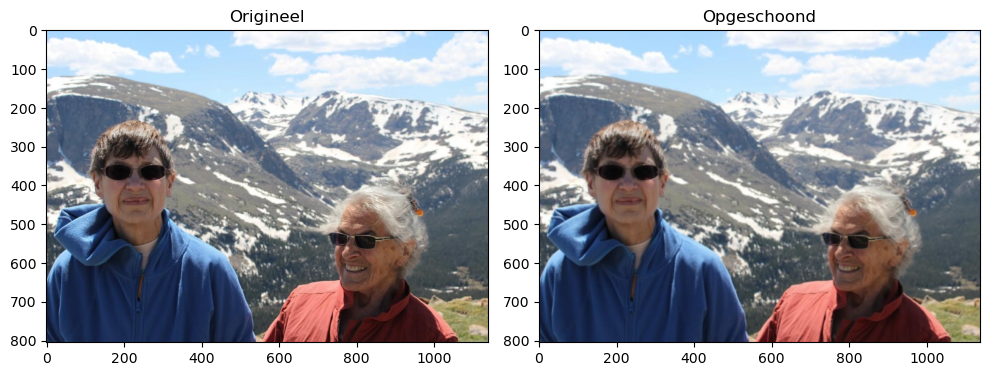

In [62]:
row = df_postapi_af[df_postapi_af["has_image"]].iloc[20]

show_verschill(row["image_path"],row["clean_image_path"])

#### Toelichting 

Niet elke Reddit-post bevat een afbeelding, dus we hebben eerst gefilterd welke posts er wel afeelding hebben. Dit heb ik gedaan met de kolom has_image, zodat we alleen afbeeldingen verwerk die ook echt bestaan en fouten in de code vermijden. Als de kolom has_image is True, betekent dit dat in die post wel afbeelging erin zit. Daarna hebben we alleen deze posts geselecteerd en op hun afbeeldingen een Gaussian Blur functie toegepast. Deze stap gebruik ik om ruis te verminderen en de afbeeldingen iets schoner te maken, wat handig is voor verdere analyse. De bewerkte afbeeldingen woorden apart opgeslagen, zodat de originele bestanden behouden blijven. Daarna wordt the path naar de opgeschoonde afbeelding teruggezet in de originele datafram zonder opnieuw te mergen. Hierdoor voorkomt het dubbele kolommen.

In de visualisatie is links de originele afbeelding te zien en rechts de opgeschoonde versie van dezelfde afbeelding. Op de rechterafbeelding is een Gaussian Blur toegepast. Deze bewerking zorgt ervoor dat kleine details en visuele ruis worden verminderd, terwijl de belangrijkste vormen en structuren in de afbeelding behouden blijven. Door beide afbeeldingen naast elkaar te tonen, dat de opgeschoonde afbeelding oogt iets zachter en minder scherp dan de orgineel, wat gewenst is omdat dit ruis kan verminderen bij verdere analyse.
___

### 2.2.1 Audio extraheren

In [63]:
def Audio_extractie(df):
    os.makedirs("audio", exist_ok=True)


    rows = []

    for idx, post in df.items():
        for j, item_post in enumerate(post):
            video_url = item_post.get("video_url")
            post_id = item_post.get("post_id")
            author = item_post.get("author")
            author_id = item_post.get("author_id")

            if not video_url or not post_id:
                print(f"Skip: missing video_url/post_id (idx={idx}, j={j})")
                continue

            # unieke outputnaam
            test_audio = f"audio/audio_{post_id}.mp3"

            try:
                subprocess.run(
                    [
                        "ffmpeg",
                        "-y",
                        "-headers",
                        "User-Agent: Mozilla/5.0\r\nReferer: https://www.reddit.com/\r\n",
                        "-i", video_url,
                        "-vn",
                        "-map", "0:a:0",          # of "0:a?" als je niet wil crashen bij ontbrekende audio
                        "-c:a", "libmp3lame",     # vaak beter dan -acodec mp3
                        test_audio
                    ],
                    check=True
                )

                rows.append({
                    "post_id": post_id,
                    "author": author,
                    "author_id": author_id,
                    "video_url": video_url,
                    "audio_path": test_audio
                })

            except subprocess.CalledProcessError:
                print(f"Audio extractie mislukt voor {post_id}")
    
    test_audio = pd.DataFrame(rows)
    return test_audio


In [64]:
subreddit_scraped_converted = Audio_extractie(subreddit_scraped)


ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 19.1.7
  configuration: --prefix=/Users/thidaratchuram/anaconda3/envs/clean311 --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-videotoolbox --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libmp3lame --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libvorbis --enable-libopus --enable-librsvg --enable-ffplay --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1753272227514/_build_env/bin/pkg-config
  libavutil      59. 39.100 

Audio extractie mislukt voor t3_1qm8arz


[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_480.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_220.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_270.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_360.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_720.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_220.m3u8' for reading
[hls @ 0x7f8e2980d7c0] Skip ('#EXT-X-VERSION:6')
[https @ 0x7f8e29042000] Opening 'https://v.redd.it/t4f1i9po20eg1/CMAF_270.m3u8' for reading
[hls @

ChatGPT 5.2, prompt 1:Audio extraheren per video, https://chatgpt.com/c/69617a16-b5f0-832f-a8cf-1dc61ab8bad4

In [65]:
subreddit_scraped_converted

,post_id,author,author_id,video_url,audio_path
0,t3_1qm5ayt,nothingnanners,t2_u20bgfmln,https://v.redd.it/x5jakwcpeefg1/HLSPlaylist.m3...,audio/audio_t3_1qm5ayt.mp3
1,t3_1qgxqxo,transblonde,t2_1wbkgrd0iz,https://v.redd.it/55l0i4erd9eg1/HLSPlaylist.m3...,audio/audio_t3_1qgxqxo.mp3
2,t3_1qg1rep,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/lk7antwu32eg1/HLSPlaylist.m3...,audio/audio_t3_1qg1rep.mp3
3,t3_1qftbgc,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/t4f1i9po20eg1/HLSPlaylist.m3...,audio/audio_t3_1qftbgc.mp3
4,t3_1qkgkuz,ihatethiscountry76,t2_1cej309fs1,https://v.redd.it/j513985ow0fg1/HLSPlaylist.m3...,audio/audio_t3_1qkgkuz.mp3


### 2.2.2 Audio opschonen

In [66]:
from scipy.signal import butter, filtfilt
import numpy as np
import librosa


def bandpass_filter(y, sr, low=500, high=6000, order=4):
    #Nyquist-frequentie maximale bruikbare frequentie
    nyq = 0.5 * sr
    #zet frequenties om naar een schaal die het filter begrijpt
    low /= nyq
    high /= nyq
    #maakt een Butterworth bandpass-filter
    b, a = butter(order, [low, high], btype="band")
    # past het filter toe --> geluid blijft natuurlijk
    return filtfilt(b, a, y)

    return df


#stilte aan het begin en einde
#alles wat zachter is dan de drempel (threshold) wordt gezien als stilte
def simple_trim(y, threshold=0.05):
    #zoekt waar het signaal “hard genoeg” is
    idx = np.where(np.abs(y) > threshold)[0]
    if len(idx) == 0:
        return y
    #bepalen het begin en einde van het spraakgedeelte
    return y[idx[0]:idx[-1]]


def clean_audio_simple(path, sr=None):
    y, sr = librosa.load(path, sr=sr)
    y = bandpass_filter(y, sr)
    y = simple_trim(y)
    y = librosa.util.normalize(y)
    return y, sr


In [67]:
import os
import soundfile as sf

def apply_clean_audio(df, audio_col="audio_path", output_dir="audio_clean"):
    os.makedirs(output_dir, exist_ok=True)
    clean_paths = []

    for _, row in df.iterrows():
        path = row[audio_col]

        # check of pad geldig is
        if not isinstance(path, str) or not os.path.exists(path):
            clean_paths.append(None)
            continue

        # audio opschonen
        y_clean, sr = clean_audio_simple(path)

        # opslaan
        out_path = os.path.join(
            output_dir,
            os.path.basename(path)
        )
        sf.write(out_path, y_clean, sr)

        clean_paths.append(out_path)

    df["clean_audio"] = clean_paths
    return df


In [68]:
subreddit_scraped_converted = apply_clean_audio(
    subreddit_scraped_converted,
    audio_col="audio_path"
)

subreddit_scraped_converted.head()


,post_id,author,author_id,video_url,audio_path,clean_audio
0,t3_1qm5ayt,nothingnanners,t2_u20bgfmln,https://v.redd.it/x5jakwcpeefg1/HLSPlaylist.m3...,audio/audio_t3_1qm5ayt.mp3,audio_clean/audio_t3_1qm5ayt.mp3
1,t3_1qgxqxo,transblonde,t2_1wbkgrd0iz,https://v.redd.it/55l0i4erd9eg1/HLSPlaylist.m3...,audio/audio_t3_1qgxqxo.mp3,audio_clean/audio_t3_1qgxqxo.mp3
2,t3_1qg1rep,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/lk7antwu32eg1/HLSPlaylist.m3...,audio/audio_t3_1qg1rep.mp3,audio_clean/audio_t3_1qg1rep.mp3
3,t3_1qftbgc,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/t4f1i9po20eg1/HLSPlaylist.m3...,audio/audio_t3_1qftbgc.mp3,audio_clean/audio_t3_1qftbgc.mp3
4,t3_1qkgkuz,ihatethiscountry76,t2_1cej309fs1,https://v.redd.it/j513985ow0fg1/HLSPlaylist.m3...,audio/audio_t3_1qkgkuz.mp3,audio_clean/audio_t3_1qkgkuz.mp3


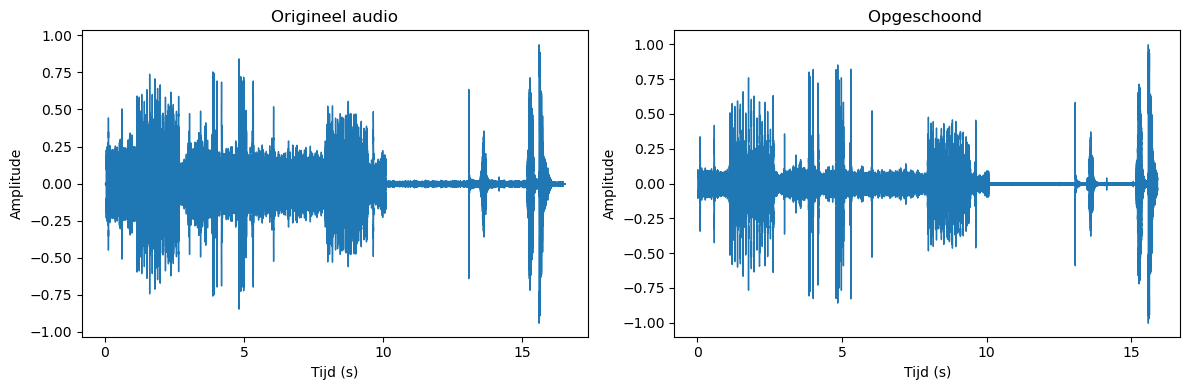

In [69]:
def show_verschill_audio(raw_path, clean_path):
    # audio laden
    raw_audio, sr_raw = librosa.load(raw_path, sr=None)
    clean_audio, sr_clean = librosa.load(clean_path, sr=None)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    librosa.display.waveshow(raw_audio, sr=sr_raw)
    plt.title("Origineel audio")
    plt.xlabel("Tijd (s)")
    plt.ylabel("Amplitude")

    plt.subplot(1, 2, 2)
    librosa.display.waveshow(clean_audio, sr=sr_clean)
    plt.title("Opgeschoond ")
    plt.xlabel("Tijd (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# pak een rij
show = subreddit_scraped_converted[subreddit_scraped_converted["clean_audio"].notna()].iloc[1]
show_verschill_audio(show["audio_path"],show["clean_audio"])


### Toelichting

In deze stap van het project is audio geëxtraheerd en opgeschoond uit Reddit-video’s. Voor het opschonen van audio is een methode gebruikt die gericht is op spraak. Het doel van deze stap is om ruis en stilte te verwijderen en het audiosignaal consistenter te maken voor verdere analyse. Hierbij wordt het geluid omgezet naar een audio-signaal en wordt de sample rate bepaald. Vervolgens wordt een bandpass-filter gebruikt om alleen de frequenties te behouden die relevant zijn voor menselijke spraak. Lage frequenties en hoge frequenties zoals ruis worden verwijderd. Hierdoor blijft vooral het stemgeluid over, wat de kwaliteit van de audio verbetert. Na het filteren wordt stilte aan het begin en einde van het audiofragment verwijderd. Dit gebeurt door alleen het gedeelte van het signaal te behouden waar de amplitude boven een bepaalde drempel ligt. Zo blijft alleen het deel over waarin daadwerkelijk gesproken wordt. Tot slot wordt het audiosignaal genormaliseerd. Dit zorgt ervoor dat alle audiofragmenten een vergelijkbaar volume hebben, ongeacht hoe hard of zacht ze oorspronkelijk zijn opgenomen.

Vervolgends hebben we gevisualiseerd om het effect van deze bewerking inzichtelijk te maken, wordt een visualisatie gebruikt waarin het originele audiosignaal wordt vergeleken met de opgeschoonde versie. Met behulp van een waveform-plot is te zien dat na noise reduction kleine, onregelmatige fluctuaties in het signaal zijn verminderd, terwijl de hoofdstructuur van het geluid behouden blijft. 
___

### 2.3.1 Tekst datasets opschonen

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)     #Verwijdert alle URLs uit de tekst
    text = re.sub(r"[^a-z\s]", "", text)    #letters (a–z)spaties (\s)
    text = re.sub(r"\s+", " ", text).strip() #Vervangt meerdere spaties door één spatie
    return text

df_text_sentiment["clean_text"] = df_text_sentiment["text"].apply(clean_text)
display(df_text_sentiment)

df_text_toxic["clean_text"] = df_text_toxic["text"].apply(clean_text)
display(df_text_toxic)

,text,label,clean_text
0,"""QT @user In the original draft of the 7th boo...",2,qt user in the original draft of the th book r...
1,"""Ben Smith / Smith (concussion) remains out of...",1,ben smith smith concussion remains out of the ...
2,Sorry bout the stream last night I crashed out...,1,sorry bout the stream last night i crashed out...
3,Chase Headley's RBI double in the 8th inning o...,1,chase headleys rbi double in the th inning off...
4,@user Alciato: Bee will invest 150 million in ...,2,user alciato bee will invest million in januar...
...,...,...,...
45610,"@user \""""So amazing to have the beautiful Lady...",2,user so amazing to have the beautiful lady gag...
45611,"9 September has arrived, which means Apple's n...",2,september has arrived which means apples new i...
45612,Leeds 1-1 Sheff Wed. Giuseppe Bellusci securin...,2,leeds sheff wed giuseppe bellusci securing luf...
45613,@user no I'm in hilton head till the 8th lol g...,1,user no im in hilton head till the th lol go t...


,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit,clean_text
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,this is so cool its like would you want your m...
1,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,thank you this would make my life a lot less a...
2,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,this is such an urgent design problem kudos to...
3,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,is this something ill be able to install on my...
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.000000,0.0,0.872340,0.021277,0.0,haha you guys are a bunch of losers
...,...,...,...,...,...,...,...,...,...
1804869,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,maybe the tax on things would be collected whe...
1804870,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,what do you call people who still think the di...
1804871,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,thank you right or wrong i am following your a...
1804872,Anyone who is quoted as having the following e...,0.621212,0.030303,0.030303,0.0,0.621212,0.045455,0.0,anyone who is quoted as having the following e...


In [71]:
#  filteren
df_text_toxic = df_text_toxic[(df_text_toxic["identity_attack"] > 0.9)]

df_text_toxic= df_text_toxic[['clean_text', "toxicity", "identity_attack"]]
df_text_toxic


,clean_text,toxicity,identity_attack
10329,damn christians,0.982435,0.953362
16346,on the other hand if you were a homosexual sto...,1.000000,1.000000
20552,the braves siletz tribe feather tomahawk etc a...,1.000000,1.000000
29155,no she was the one who said this looking at a ...,1.000000,1.000000
38117,then lets put the gay men on an island and les...,1.000000,1.000000
...,...,...,...
1761139,homosexuality is a biological issue and not on...,0.818182,0.909091
1764484,lets build a theme park on temple mount it wil...,0.833333,1.000000
1778892,mental health problem until hes muslim,1.000000,1.000000
1784952,just kill all white males who own guns problem...,0.973079,0.921208


### Omschrijving
Na het laden van de datasets zijn verschillende preprocessing-stappen uitgevoerd, waaronder:

- het opschonen van tekst z oalslowercase, verwijderen van URL’s en speciale tekens

- het selecteren van relevante kolommen

- het filteren van sterk toxische voorbeelden op basis van toxiciteitsscores.

# 3 Transformatie en feature engineering

### 3.1.1 Afbeelding transformeren

In [ ]:
def to_gray(image_path, output_dir="images_gray"):
    # zorg dat de map bestaat
    os.makedirs(output_dir, exist_ok=True)

    img = io.imread(image_path)

    # RGB naar grijs
    gray = color.rgb2gray(img)

    # omzetten naar 8-bit voor opslaan
    gray_ubyte = img_as_ubyte(gray) #(0–255)

    filename = os.path.basename(image_path)
    output_path = os.path.join(output_dir, filename)

    io.imsave(output_path, gray_ubyte)
    return output_path

In [73]:
df_postapi_af["gray_image"] = df_postapi_af.apply(lambda row: to_gray(row["clean_image_path"])if row["has_image"] and isinstance(row["clean_image_path"], 
                            str)and os.path.exists(row["clean_image_path"])else None,axis=1)

In [74]:
df_postapi_af

,subreddit,title,score,url,text,created_utc,id,author,image_path,has_image,clean_image_path,gray_image
0,actuallesbians,Why is it never me?!😭,17279,https://i.redd.it/9obr4x6aavrd1.jpeg,,2024-09-30 03:37:10,1fsmicm,LilDemonAnubis,NaN,False,nan,NaN
1,actuallesbians,Actor Murdered First Day of Pride,13747,https://i.redd.it/usia4qbpwk4f1.jpeg,I know I posted something that got the ladies ...,2025-06-02 21:05:49,1l1tp5u,None,NaN,False,nan,NaN
2,actuallesbians,90% of the series,13382,https://i.redd.it/xsvixgkymh3c1.jpg,,2023-11-30 13:35:15,187io2m,None,reddit_images/187io2m.jpg,True,images_clean/187io2m.jpg,images_gray/187io2m.jpg
3,actuallesbians,Teaching Nancy New Combos,12564,https://i.redd.it/c4ttt6e5q1sf1.png,,2025-09-29 06:14:39,1ntalcz,dreamed2life,reddit_images/1ntalcz.png,True,images_clean/1ntalcz.png,images_gray/1ntalcz.png
4,actuallesbians,Ordo Iuris. Upvote so that this picture shows ...,11685,https://i.redd.it/fa2bsprjed251.jpg,,2020-06-01 21:55:20,gutzjs,Frank-Blue,reddit_images/gutzjs.jpg,True,images_clean/gutzjs.jpg,images_gray/gutzjs.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,AskTrumpSupporters,Donald Trumps slogan for his 2020 presidential...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,What do you feel Donald Trump has done to make...,2020-07-23 03:45:10,hw8nm5,fluffyypickel,NaN,False,nan,NaN
1983,AskTrumpSupporters,What do you think of Trump's new medical advisor?,337,https://www.reddit.com/r/AskTrumpSupporters/co...,[Scott Atlas](https://www.forbes.com/sites/mat...,2020-08-15 12:23:16,ia6eqx,not_falling_down,NaN,False,nan,NaN
1984,AskTrumpSupporters,Lori Klaustis's widow asked Twitter to remove ...,338,https://www.reddit.com/r/AskTrumpSupporters/co...,Lori Klaustis was part of Joe Scarborough's co...,2020-05-26 17:14:26,gr169e,goko305,NaN,False,nan,NaN
1985,AskTrumpSupporters,CPAC formally uninvited Mitt Romney after his ...,333,https://www.reddit.com/r/AskTrumpSupporters/co...,"[BREAKING: The ""extreme conservative"" and Juni...",2020-02-01 22:01:01,exddli,Quidfacis_,NaN,False,nan,NaN


### 3.1.2 De result visualiseren

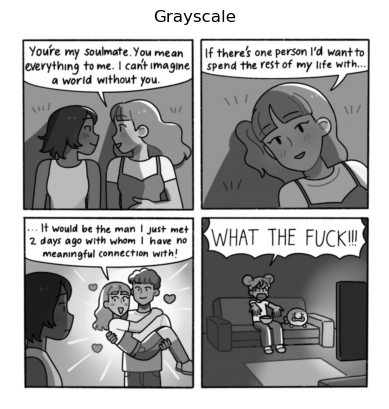

In [75]:
def show_image(image_path, title="Image", cmap_type="gray"):
    if image_path is None:
        print("Geen afbeelding beschikbaar")
        return

    img = io.imread(image_path)
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()


show_image(df_postapi_af.loc[2, "gray_image"],title="Grayscale")

### 3.1.3 Toelichting

Na het opschonen van de afbeeldingen zijn deze verder getransformeerd door ze om te zetten naar grijswaarden. Hiervoor is gebruikgemaakt van de scikit-image library. De functie to_gray leest een opgeschoonde afbeelding in, zet deze om van RGB-kleuren naar grijswaarden en slaat het resultaat op als een nieuw afbeeldingsbestand. Door de afbeelding om te zetten naar 8-bit formaat kan deze correct worden opgeslagen en verder verwerkt. De transformatie is alleen toegepast op posts die daadwerkelijk een afbeelding bevatten. Dit wordt gecontroleerd met de kolom has_image, zodat fouten worden voorkomen wanneer een afbeelding ontbreekt. Het pad naar de grijswaarden-afbeelding wordt vervolgens toegevoegd aan de dataset in een nieuwe kolom (gray_image).

Om het resultaat te controleren en te visualiseren, is een functie gebruikt die de grijswaarden-afbeelding toont. Deze visualisatie laat zien dat kleurinformatie is verwijderd en alleen de helderheid van de afbeelding is overgebleven.

ChatGPT 5.2, prompt 1 en 2: Fout Bestandspad niet gevonden, https://chatgpt.com/share/69737556-0b20-8009-93da-137bed011820

### 3.2.1 Feature engineering functies
functies die worden gebruikt op de data

In [ ]:
# AFBEELDING GEDEELTE !!!!!!!!

# tekst uit de afbeelding halen
def ocr_from_gray(image_path):
    # None of NaN overslaan
    if image_path is None or pd.isna(image_path):
        return None

    # pad moet bestaan
    #image_path een string is
    if not isinstance(image_path, str) or not os.path.exists(image_path):
        return None

    try:
        img = io.imread(image_path)
        #Omzetten naar PIL-afbeelding (het formaat van de Python Imaging Library)
        pil_img = Image.fromarray(img)

        text = pytesseract.image_to_string(
            pil_img,
            lang="eng",   
        )
        return text.strip()

    except Exception as e:
        print(f"OCR mislukt voor {image_path}: {e}")
        return None


# helderheidsverdeling van de afbeelding berekenen
def histogram_features(image_path, bins=16):
    if not isinstance(image_path, str) or not os.path.exists(image_path):
        return None

    img = io.imread(image_path)
    hist, _ = np.histogram(img, bins=bins, range=(0, 255), density=True)
    return hist.tolist()


#____________________________________________________________________________________________________


# Audio gedeelte !!!
def key_words_determiner(df,clean_text="clean_body"):
    df["tokens"] = df[clean_text].str.split()
    stopwords = {
        "the","and","to","of","a","in","is","it","that","for","on","with",
        "as","this","be","are","was","but","have","not","they","you","i",
        "we","he","she","them","his","her","their","my","me","our","your",
        "at","by","from","or","an","if","so","do","does","did","can","will",
        "would","should","could","about","what","which","when","how","why"
    }
    word_counter = Counter()

    for tokens in df["tokens"]:
        word_counter.update(
        w for w in tokens if w not in stopwords and len(w) > 2
        )
    return word_counter.most_common(30)


#woord diversiteit,bepaald de diversiteit van de gebruikte worden van een tekst (voeg hier nog niveu aan toe)

def woord_diveriteit(text):

    if text is None or (isinstance(text, float) and pd.isna(text)):
        return None


    text = str(text).strip()
    if text == "":
        return None


    tokens = re.findall(r"[A-Za-z0-9]+", text) 
    if len(tokens) == 0:  #Verwijdert spaties aan begin en einde
        return None

    safe_text = " ".join(tokens) #Zet de tokens weer om naar een schone tekst

    lex = LexicalRichness(safe_text) #Maakt een object 

    
    if getattr(lex, "words", 0) == 0:
        return None

    return lex.mtld() #Measure of Textual Lexical Diversity

### Omschrijving van feature engineering functies

De code hierboven bestaan uit fucties van 2 gedeelten zowel afbeelding als audio.

1. **ocr_from_gray functie**

In dit onderdeel van het project zijn zowel afbeeldingen als audio verder geanalyseerd door middel van feature engineering. Voor afbeeldingen is eerst tekst geëxtraheerd met behulp van Optical Character Recognition (OCR). De functie ocr_from_gray leest een grijswaarden-afbeelding in, zet deze om naar een PIL-afbeelding en past vervolgens Tesseract OCR toe om eventuele tekst in de afbeelding te herkennen. Hierbij wordt gecontroleerd of het afbeeldingspad geldig is, zodat fouten door ontbrekende afbeeldingen worden voorkomen. De herkende tekst wordt teruggegeven als string of leeg gelaten wanneer OCR niet mogelijk is.

2. **clean_text functie**

Na het extraheren van tekst uit afbeeldingen is deze tekst opgeschoond. In de functie clean_text wordt alle tekst omgezet naar kleine letters, worden URLs, speciale tekens en overbodige spaties verwijderd en blijft alleen betekenisvolle alfabetische tekst over. 

3. **histogram_features functie**

Naast tekstextractie is ook visuele informatie uit afbeeldingen gehaald. Met de functie histogram_features wordt de helderheidsverdeling van een afbeelding berekend aan de hand van een histogram. Dit histogram beschrijft hoe licht- en donkerwaarden in de afbeelding zijn verdeeld en vormt een numerieke samenvatting van de visuele inhoud.

4. **key_words_determiner functie**

Voor het audio-gedeelte is gewerkt met tekst die afkomstig is uit audio zoals transcripties. Met de functie key_words_determiner zijn de meest voorkomende woorden in de dataset bepaald. Hierbij worden stopwoorden verwijderd en blijven alleen betekenisvolle woorden over. 

5. **woord_diveriteit functie**

Daarnaast is woorddiversiteit berekend met de functie woord_diveriteit. Deze maat beschrijft hoe gevarieerd het taalgebruik is binnen een tekst. Hiervoor wordt gebruikgemaakt van een lexicale rijkdomsmaat (MTLD), die rekening houdt met zowel de lengte van de tekst als het aantal unieke woorden. Deze feature geeft inzicht in de complexiteit en variatie van het taalgebruik in audiofragmenten.
___

#### 3.2.2 OCR functie toepassen om tekst uit de afbeelding te halen

Hierbij krijg je de tekst uit de afbeelding en sla je het op in een nieuwe kolom heet 'ocr_text'. 

In [77]:
df_postapi_af["ocr_text"] = df_postapi_af["gray_image"].apply(ocr_from_gray)
print(df_postapi_af["ocr_text"])
print('__________________________________________________')

0                                                     NaN
1                                                     NaN
2       Youre my Soulmate. You mean | | If theres one ...
3       a Aes\nf Nancy Mace ©\n\n| want our kids to le...
4                                                        
                              ...                        
1982                                                  NaN
1983                                                  NaN
1984                                                  NaN
1985                                                  NaN
1986                                                  NaN
Name: ocr_text, Length: 1987, dtype: str
__________________________________________________


#### 3.2.3 clean_text functie toepassen om de tekst van afbeelding te opschonen 
Hierbij  krijg opgeschone tekst die je hebt uitgehaald bij vorige functie. En die wordt opgeslagen in de nieuwe kolom, heet ocr_clean.

In [78]:
df_postapi_af["ocr_clean"] = df_postapi_af["ocr_text"].apply(clean_text)
display(df_postapi_af["ocr_clean"])
print('__________________________________________________')

0                                                     nan
1                                                     nan
2       youre my soulmate you mean if theres one perso...
3       a aes f nancy mace want our kids to learn abou...
4                                                        
                              ...                        
1982                                                  nan
1983                                                  nan
1984                                                  nan
1985                                                  nan
1986                                                  nan
Name: ocr_clean, Length: 1987, dtype: str

__________________________________________________


#### 3.2.4 Helderheidsverdeling van de afbeelding berekenen 

Hierbij krijg je een lijst van 16 waarden in image_hist kolom. Waarbij elke waarde is verhouding pixels in dat intensiteitsbereik.

In [79]:
df_postapi_af["image_hist"] = df_postapi_af["clean_image_path"].apply(histogram_features)
display(df_postapi_af["image_hist"])
print('__________________________________________________')

0                                                    None
1                                                    None
2       [0.0027519607065973435, 0.0021960734575241117,...
3       [0.0019214348311575819, 0.0008739535817637433,...
4       [0.0008299633086105157, 0.002895442604882506, ...
                              ...                        
1982                                                 None
1983                                                 None
1984                                                 None
1985                                                 None
1986                                                 None
Name: image_hist, Length: 1987, dtype: object

__________________________________________________


#### 3.3.1 transscript van de audio uithalen


Hierbij vertaalt je per audio bestand naar een transcriptie en maak je een nieuwe kolom heet 'transcript'.

In [ ]:
#kijk hier nog naar, try moet weg (niet goed)
r = sr.Recognizer()

for idx, row in subreddit_scraped_converted.iterrows():
    mp3_path = row["audio_path"]
    wav_path = f"transcript_{idx}.wav" #SpeechRecognition  werken:stabieler, nauwkeuriger, met WAV-bestanden.

    AudioSegment.from_mp3(mp3_path) \
        .set_channels(1) \
        .set_frame_rate(14000) \
        .export(wav_path, format="wav")
        #mono-audio
        #14 kHz
    try:
        with sr.AudioFile(wav_path) as source:
            audio = r.record(source) #Maakt het klaar voor herkenning.

        text_audio = r.recognize_google(audio, language="en-US")
        subreddit_scraped_converted.loc[idx, "transcript"] = text_audio
        print(idx, text_audio)

    except sr.UnknownValueError:
        subreddit_scraped_converted.loc[idx, "transcript"] = "None"
        print(idx, " niet verstaan")

    except sr.RequestError as e:
        print(idx, " api fout:", e)

0  niet verstaan
1  niet verstaan
2  niet verstaan
3 god
4  niet verstaan


In [81]:
display(subreddit_scraped_converted)


,post_id,author,author_id,video_url,audio_path,clean_audio,transcript
0,t3_1qm5ayt,nothingnanners,t2_u20bgfmln,https://v.redd.it/x5jakwcpeefg1/HLSPlaylist.m3...,audio/audio_t3_1qm5ayt.mp3,audio_clean/audio_t3_1qm5ayt.mp3,None
1,t3_1qgxqxo,transblonde,t2_1wbkgrd0iz,https://v.redd.it/55l0i4erd9eg1/HLSPlaylist.m3...,audio/audio_t3_1qgxqxo.mp3,audio_clean/audio_t3_1qgxqxo.mp3,None
2,t3_1qg1rep,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/lk7antwu32eg1/HLSPlaylist.m3...,audio/audio_t3_1qg1rep.mp3,audio_clean/audio_t3_1qg1rep.mp3,None
3,t3_1qftbgc,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/t4f1i9po20eg1/HLSPlaylist.m3...,audio/audio_t3_1qftbgc.mp3,audio_clean/audio_t3_1qftbgc.mp3,god
4,t3_1qkgkuz,ihatethiscountry76,t2_1cej309fs1,https://v.redd.it/j513985ow0fg1/HLSPlaylist.m3...,audio/audio_t3_1qkgkuz.mp3,audio_clean/audio_t3_1qkgkuz.mp3,None


#### 3.3.2 Voorkomende woorden van audio dataset

Hierbij krijg je een list met verschillende tuples van voorkomende woorden.

In [82]:
top_woorden_audio = key_words_determiner(subreddit_scraped_converted,clean_text="transcript")
print(top_woorden_audio)
print('__________________________________________________')

[('None', 4), ('god', 1)]
__________________________________________________


#### 3.3.3 Woord_diveriteit toepassen op de dataset

Hierbij krijg je een complexiteit en variatie van het taalgebruik in audiofragmenten in nieuwe kolom, heet woord_diveriteit.

In [83]:
subreddit_scraped_converted["woord_diveriteit"] = subreddit_scraped_converted["transcript"].apply(woord_diveriteit)
subreddit_scraped_converted

,post_id,author,author_id,video_url,audio_path,clean_audio,transcript,tokens,woord_diveriteit
0,t3_1qm5ayt,nothingnanners,t2_u20bgfmln,https://v.redd.it/x5jakwcpeefg1/HLSPlaylist.m3...,audio/audio_t3_1qm5ayt.mp3,audio_clean/audio_t3_1qm5ayt.mp3,None,[None],1.0
1,t3_1qgxqxo,transblonde,t2_1wbkgrd0iz,https://v.redd.it/55l0i4erd9eg1/HLSPlaylist.m3...,audio/audio_t3_1qgxqxo.mp3,audio_clean/audio_t3_1qgxqxo.mp3,None,[None],1.0
2,t3_1qg1rep,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/lk7antwu32eg1/HLSPlaylist.m3...,audio/audio_t3_1qg1rep.mp3,audio_clean/audio_t3_1qg1rep.mp3,None,[None],1.0
3,t3_1qftbgc,Lavender-n-Lipstick,t2_12863lkz7l,https://v.redd.it/t4f1i9po20eg1/HLSPlaylist.m3...,audio/audio_t3_1qftbgc.mp3,audio_clean/audio_t3_1qftbgc.mp3,god,[god],1.0
4,t3_1qkgkuz,ihatethiscountry76,t2_1cej309fs1,https://v.redd.it/j513985ow0fg1/HLSPlaylist.m3...,audio/audio_t3_1qkgkuz.mp3,audio_clean/audio_t3_1qkgkuz.mp3,None,[None],1.0


# 4 Laden: dataframes opslaan in SQL-database


In [84]:
# sommige df bevat list in de kolom
#deze functie zet list om in json formaat
import json

def convert_lists_to_json(df):
    df = df.copy()
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].apply(
                lambda x: json.dumps(x) if isinstance(x, list) else None
            )
    return df


In [85]:
dfcopy= df_postapi_af.copy()

In [86]:
reddit_posts_af = convert_lists_to_json(dfcopy)


In [87]:
subreddit_audio_sql = convert_lists_to_json(subreddit_scraped_converted)


In [88]:
import sqlite3

conn = sqlite3.connect("multimodal_reddit.db")

reddit_posts_af.to_sql("reddit_posts_af",conn,if_exists="replace",index=False)

subreddit_audio_sql.to_sql("reddit_audio",conn,if_exists="replace",index=False)

df_text_sentiment.to_sql("df_text_sentiment",conn,if_exists="replace",index=False)

df_text_toxic.to_sql("df_text_toxic",conn,if_exists="replace",index=False)

conn.close()

print("De tabellen zijn opgeslagen in de database.")


De tabellen zijn opgeslagen in de database.


## Pipeline ontbreekt